In [1]:
import torch
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import HDBSCAN
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

from model import Encoder, Decoder
from data import FlagDataset
from utils import get_device

In [2]:
DEVICE = get_device()
flags_to_omit=["bq", "gb-nir", "sh", "sj", "bv", "bq", "mq", "gf", "nc", "re", "mf", "bl", "gp", "yt", "pm"]
flag_dataset = FlagDataset("flags", device=DEVICE, flags_to_omit=flags_to_omit)
flag_size = flag_dataset[0][0].shape[1]

latent_size = 16
encoder = Encoder(flag_size=flag_size, latent_size=latent_size).to(DEVICE)
pre_flatten_size = encoder.pre_flatten_size
print(latent_size, pre_flatten_size)
decoder = Decoder(latent_size, pre_flatten_size).to(DEVICE)

encoder.load_state_dict(torch.load("encoder.pth", weights_only=True))
decoder.load_state_dict(torch.load("decoder.pth", weights_only=True))

16 torch.Size([32, 2, 2])


<All keys matched successfully>

In [3]:
latent_flags = [encoder(flag[0].unsqueeze(0))[0].detach().cpu().numpy() for flag in flag_dataset]
countries = [flag[1] for flag in flag_dataset]

In [4]:
pca = PCA(n_components=2)
pca_flags = pca.fit_transform(latent_flags)

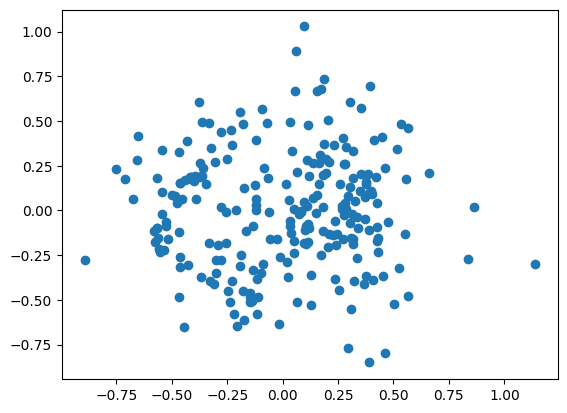

In [5]:

plt.scatter(pca_flags[:, 0], pca_flags[:, 1])


In [10]:
clusterer = HDBSCAN(min_cluster_size=4)
clusters = clusterer.fit_predict(pca_flags)

In [15]:
def print_clusters(clusters, countries):
    all_clusters = np.unique(clusters)
    for cluster_idx in all_clusters:
        cluster_countries = np.array(countries)[clusters == cluster_idx]
        print(f"Cluster {cluster_idx}: {', '.join(cluster_countries)}")

to_pil = ToPILImage()
        
def show_cluster(clusters, countries, cluster_idx):
    cluster_countries = np.array(countries)[clusters == cluster_idx]
    cluster_latent_flags = np.array(latent_flags)[clusters == cluster_idx]
    average_flag_latent = np.mean(cluster_latent_flags, axis=0)
    average_flag = decoder(torch.tensor(average_flag_latent).unsqueeze(0).float().to(DEVICE)).squeeze().cpu()
    print(f"Cluster {cluster_idx}: {', '.join(cluster_countries)}")
    for country in cluster_countries:
        flag = flag_dataset[countries.index(country)][0].squeeze().cpu()
        flag = to_pil(flag)
        flag.show()
    print(f"Average flag for cluster {cluster_idx}:")
    average_flag = to_pil(average_flag)
    average_flag.show()

        
print_clusters(clusters, countries)

Cluster -1: pg, bh, kh, id, gt, kn, td, dz, ws, bb, so, im, at, tl, no, tz, tv, hr, es, gi, mg, be, sz, pl, gy, tg, cw, ge, mn, cy, br, aw, gw, to, ga, ne, fm, bw, bt, kw, gb-wls, gg, se, mm, io, ro, mh, vc, ax, cv, lv, va, gd, pk, jp, zm, ar, ae, gb, cd, hn, mp, pr, cu, ad, nr, md, nf, dm, bi, la, hu, af, gr, ch, ba, il, fj, in, cx, al, bz, ki, ht, km, do, ua, mc, lt, as, cc, bn, mx, ir, gm, vi, ng, py, pw, bo, mr, qa, aq, np, bm, gu, bg
Cluster 0: eu, is, xk, tf
Cluster 1: ye, eg, sg, lb, iq, sy
Cluster 2: tt, ee, bd, li, ls, lu, cr
Cluster 3: my, uz, jo, sb, ps, az, um, eh, er, sc, ss, jm, us, ph
Cluster 4: kz, kp, lc, bs
Cluster 5: ai, ck, nz, tc, ms, gb-sct, hm, ky, sv, pn, au, gs, ni, fk, tk, vg
Cluster 6: mk, nu, lk, st, et, si, zw, om, tj, gb-eng, by, lr, fi, sd, ca, me, ie, je
Cluster 7: sx, sl, ag, ke, fr, na, cf, sa, mo, th, rw
Cluster 8: cz, sr, rs, nl, wf, uy, ly, dj, pa
Cluster 9: co, ma, bj, za, ao, mu, pe, gn, ci, gh, sn, ml, cg, pt, tm, mv, sm, cm, it, ec, ve, ug, fo, 

Cluster 0: eu, is, xk, tf


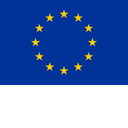

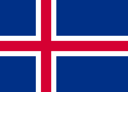

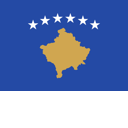

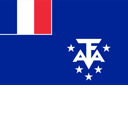

Average flag for cluster 0:


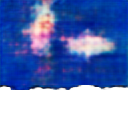

Cluster 1: ye, eg, sg, lb, iq, sy


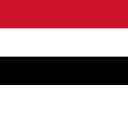

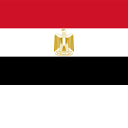

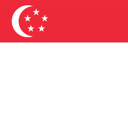

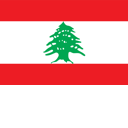

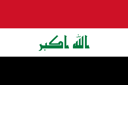

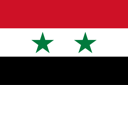

Average flag for cluster 1:


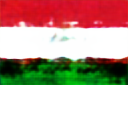

Cluster 2: tt, ee, bd, li, ls, lu, cr


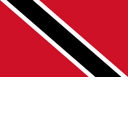

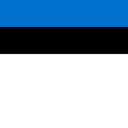

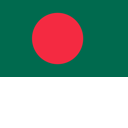

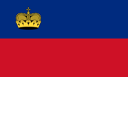

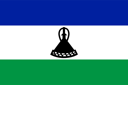

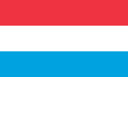

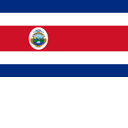

Average flag for cluster 2:


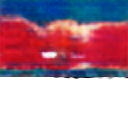

Cluster 3: my, uz, jo, sb, ps, az, um, eh, er, sc, ss, jm, us, ph


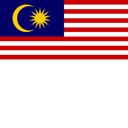

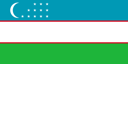

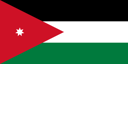

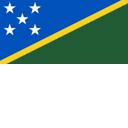

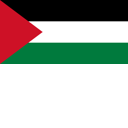

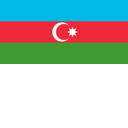

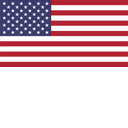

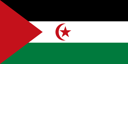

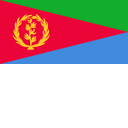

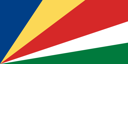

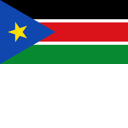

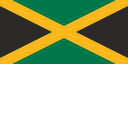

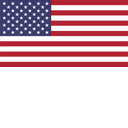

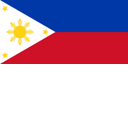

Average flag for cluster 3:


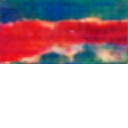

Cluster 4: kz, kp, lc, bs


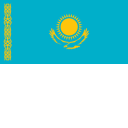

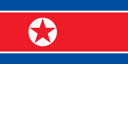

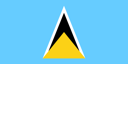

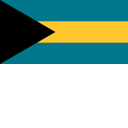

Average flag for cluster 4:


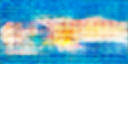

Cluster 5: ai, ck, nz, tc, ms, gb-sct, hm, ky, sv, pn, au, gs, ni, fk, tk, vg


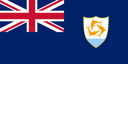

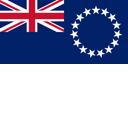

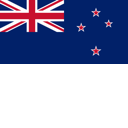

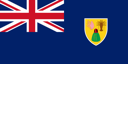

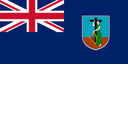

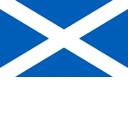

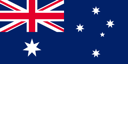

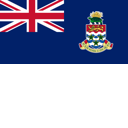

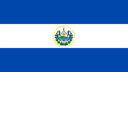

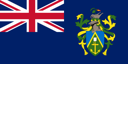

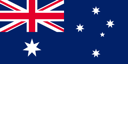

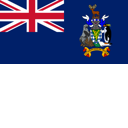

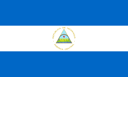

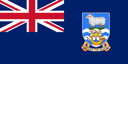

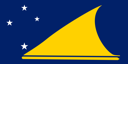

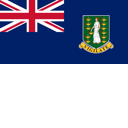

Average flag for cluster 5:


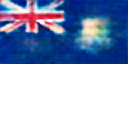

Cluster 6: mk, nu, lk, st, et, si, zw, om, tj, gb-eng, by, lr, fi, sd, ca, me, ie, je


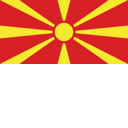

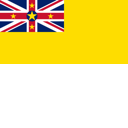

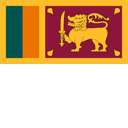

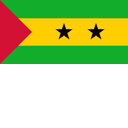

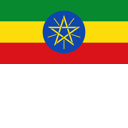

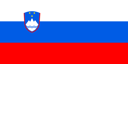

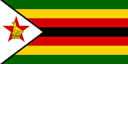

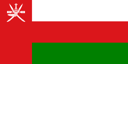

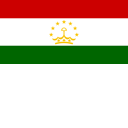

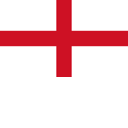

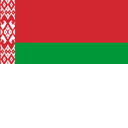

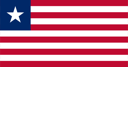

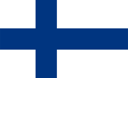

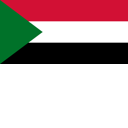

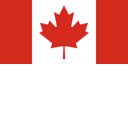

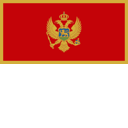

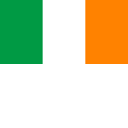

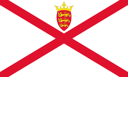

Average flag for cluster 6:


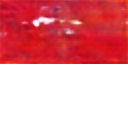

Cluster 7: sx, sl, ag, ke, fr, na, cf, sa, mo, th, rw


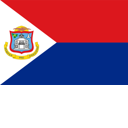

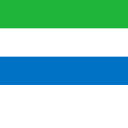

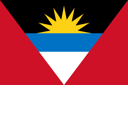

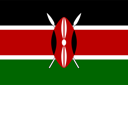

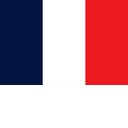

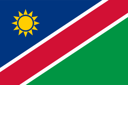

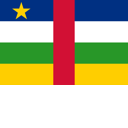

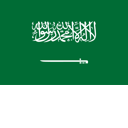

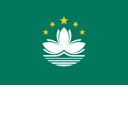

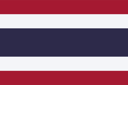

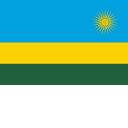

Average flag for cluster 7:


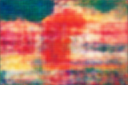

Cluster 8: cz, sr, rs, nl, wf, uy, ly, dj, pa


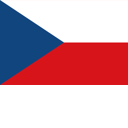

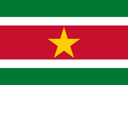

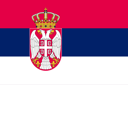

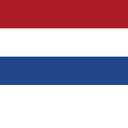

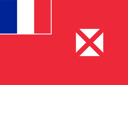

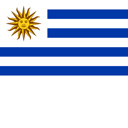

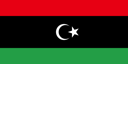

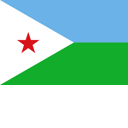

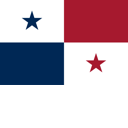

Average flag for cluster 8:


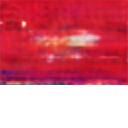

Cluster 9: co, ma, bj, za, ao, mu, pe, gn, ci, gh, sn, ml, cg, pt, tm, mv, sm, cm, it, ec, ve, ug, fo, mz, vn, dk, bf, mw


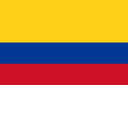

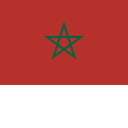

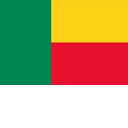

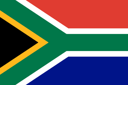

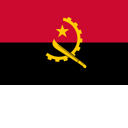

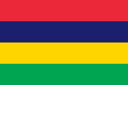

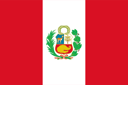

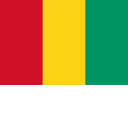

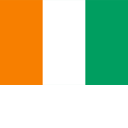

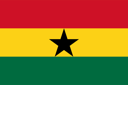

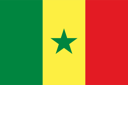

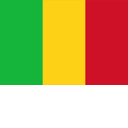

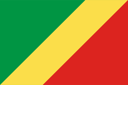

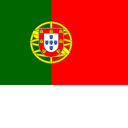

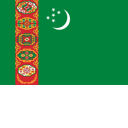

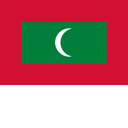

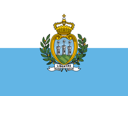

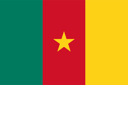

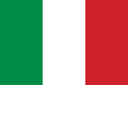

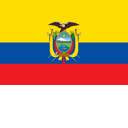

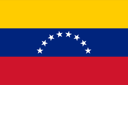

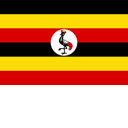

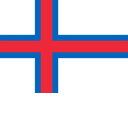

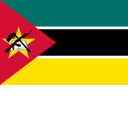

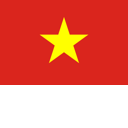

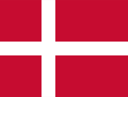

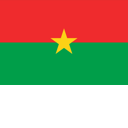

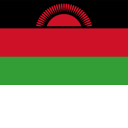

Average flag for cluster 9:


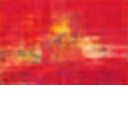

Cluster 10: gq, pf, cn, hk, tr, sk, kr, mt, vu


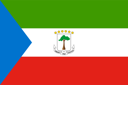

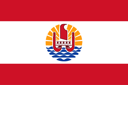

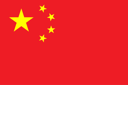

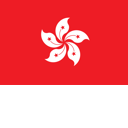

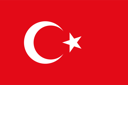

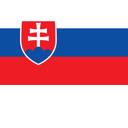

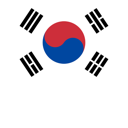

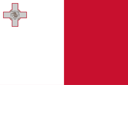

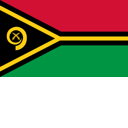

Average flag for cluster 10:


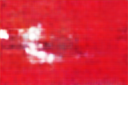

Cluster 11: am, kg, gl, de


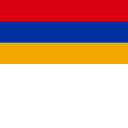

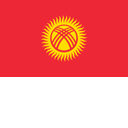

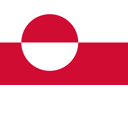

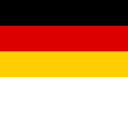

Average flag for cluster 11:


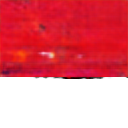

Cluster 12: tn, tw, ru, cl


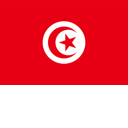

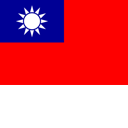

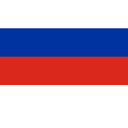

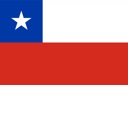

Average flag for cluster 12:


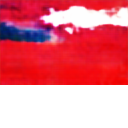

In [16]:
for cluster_idx in np.unique(clusters):
    if cluster_idx == -1:
        continue
    show_cluster(clusters, countries, cluster_idx)